### 3.8 多层感知机

In [1]:
import torch
from torch import nn
from torch.nn import init
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import sys
import os, sys
sys.path.append("..")
import d2lzh_pytorch.utils as d2l
np.random.seed(666)
cur_path = os.path.abspath(os.path.dirname('__file__'))
data_path = cur_path.replace('dl\dive-into-dl\chapter03-dl-basics', 'data\\')
data_path

'/Users/tom/Work/workspace/pycharm/machine-learning/dl/dive-into-dl/chapter03-dl-basics'

### 3.8.2 激活函数

In [2]:
def xyplot(x_vals, y_vals, name):
    d2l.set_figsize(figsize=(5, 2.5))
    d2l.plt.plot(x_vals.detach().numpy(), y_vals.detach().numpy())
    d2l.plt.xlabel('x')
    d2l.plt.ylabel(name + '(x)')
    d2l.plt.title(name)

### 3.8.2.1 ReLU函数

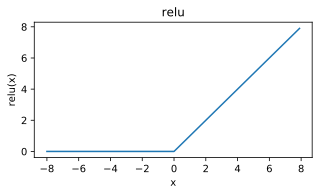

In [3]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = x.relu()
xyplot(x, y, 'relu')

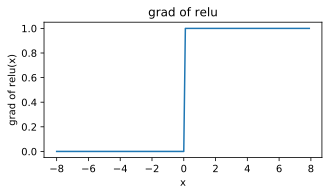

In [4]:
y.sum().backward()
xyplot(x, x.grad, 'grad of relu')

### 3.8.2.2 sigmoid函数

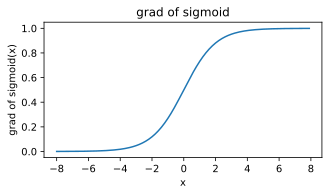

In [5]:
y = x.sigmoid()
# retain_graph=True 反响传播时不释放内存
# backward() 时,默认会free掉整个计算图
# 每一次迭代的时候,只需一次 forward() 和一次 backward()
# 两者一般成对存在
y.sum().backward(retain_graph=True)
xyplot(x, y, 'grad of sigmoid')

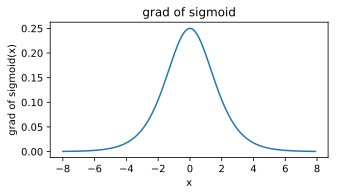

In [6]:
x.grad.zero_()
y.sum().backward(retain_graph=True)
xyplot(x, x.grad, 'grad of sigmoid')

### 3.8.2.3 tanh函数

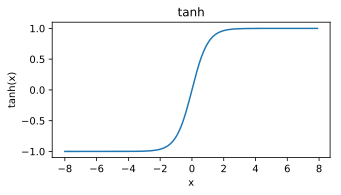

In [7]:
y = x.tanh()
xyplot(x, y, 'tanh')

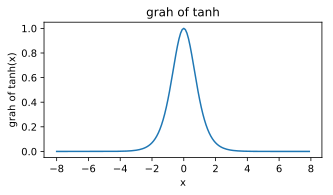

In [8]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grah of tanh')